In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [8]:
csvs_list = glob.glob('models_data/*.json')
csvs_list

['models_data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR50_BATCH.json',
 'models_data/model_reduced_jac_jac_dice_sizeX2_50ep_lr5E5_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 'models_data/model_reduced_jac_jac_dice_sizeX2_80ep_lr5E5_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 'models_data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR15_BATCH.json',
 'models_data/model_reduced_jac_jac_dice_sizeX2_100ep_lr1E4_batch_16_new_jac_VAR_MAYOR30_BATCH.json',
 'models_data/model_reduced_jac_jac_dice_sizeX2_50ep_lr1E4_batch_16_new_jac_VAR_MAYOR30_BATCH.json']

In [13]:
history = pd.read_json(csvs_list[3]).to_dict()
EPOCHS = len(history['loss'])

In [ ]:
def save_plots(model_name,history,epochs):
    path = 'models_plots/'
    
    os.mkdir(path + model_name)
    
    acc = list(history['jacard_coef'].values())
    val_acc = list(history['val_jacard_coef'].values())

    acc_dice = list(history['DiceLoss'].values())
    val_acc_dice = list(history['val_DiceLoss'].values())

    loss = list(history['loss'].values())
    val_loss = list(history['val_loss'].values())

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc, label='Training Accuracy IoU')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy IoU')

    fig.savefig(path + model_name + '/accuracy.jpg')

    fig2 = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    # plt.show()

    fig2.savefig(path + model_name + '/loss.jpg')

    fig3 = plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc_dice, label='Training Dice Acc')
    plt.plot(epochs_range, val_acc_dice, label='Validation Dice Acc')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy Dice')
    # plt.show()

    fig3.savefig(path + model_name + '/dice.jpg')

In [ ]:
for item in csvs_list:
    history = pd.read_json(item).to_dict()
    model_name = item.split('/')[1].split('.')[0]
    save_plots(model_name,history,len(history['loss']))

In [15]:
list(history['lr'].values())

[0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 0.0001,
 9.499999600000001e-05,
 9.0249996e-05,
 8.573750000000002e-05,
 8.145062e-05,
 7.737809000000001e-05,
 7.350919e-05,
 6.983373e-05,
 6.634204000000001e-05,
 6.302494000000001e-05,
 5.9873695e-05,
 5.6880010000000005e-05,
 5.403601e-05,
 5.133421000000001e-05,
 4.876750000000001e-05,
 4.6329125e-05,
 4.4012668000000005e-05,
 4.1812033e-05,
 3.9721430000000004e-05,
 3.773536e-05,
 3.5848592e-05,
 3.4056164e-05,
 3.2353357e-05,
 3.0735690000000004e-05,
 2.9198905000000003e-05,
 2.773896e-05,
 2.6352012000000004e-05,
 2.5034411000000002e-05,
 2.378269e-05,
 2.2593555e-05,
 2.1463877000000003e-05,
 2.0390682000000002e-05,
 1.9371148e-05,
 1.840259e-05,
 1.748246e-05,
 1.6608337e-05,
 1.5777921e-05,
 1.4989026000000003e-05,
 1.4239575000000002e-05,
 1.3527596000000001e-05,
 1.2851216500000002e-05,
 1.2208656e-05,
 1.1598223000000001e-05,
 1.1018312e

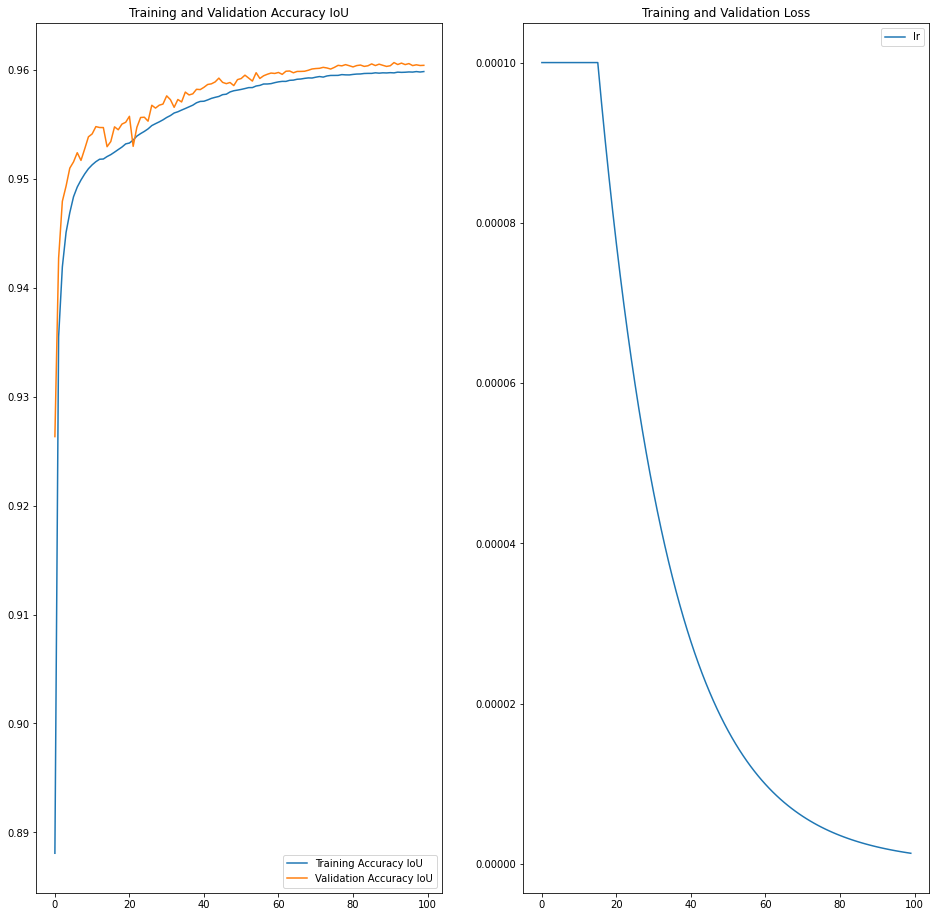

In [14]:
acc = list(history['jacard_coef'].values())
val_acc = list(history['val_jacard_coef'].values())

acc_dice = list(history['DiceLoss'].values())
val_acc_dice = list(history['val_DiceLoss'].values())

loss = list(history['loss'].values())
val_loss = list(history['val_loss'].values())

epochs_range = range(EPOCHS)

fig = plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy IoU')
plt.plot(epochs_range, val_acc, label='Validation Accuracy IoU')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy IoU')

plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.plot(epochs_range,list(history['lr'].values()),label='lr')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
